# POS Tagging con Spacy

## Instalación de Dependencias (Ejecutar primero)

In [1]:
!pip install -q nltk spacy pandas matplotlib seaborn

# Descargar modelo de Spacy
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm", "-q"])

print("✅ Todas las dependencias instaladas correctamente")


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Todas las dependencias instaladas correctamente


## 1. Importar Librerías Necesarias

In [2]:
# Importar todas las librerías necesarias
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import path
from collections import Counter
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [3]:
# Descargar recursos necesarios de Spacy (si no están ya instalados)
import spacy

print("Cargando recursos de Spacy...\n")

# Cargar modelo de Spacy en inglés
print("Cargando modelo de Spacy...")
try:
    nlp = spacy.load("en_core_web_sm")
    print("✓ Modelo de Spacy cargado correctamente")
except OSError:
    print("⚠ Modelo no encontrado. Instalando...")
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"], check=True)
    nlp = spacy.load("en_core_web_sm")
    print("✓ Modelo de Spacy instalado y cargado")

print("\n" + "="*60)
print("¡Listo para comenzar con el POS Tagging!")
print("="*60)

Cargando recursos de Spacy...

Cargando modelo de Spacy...
✓ Modelo de Spacy cargado correctamente

¡Listo para comenzar con el POS Tagging!


## Carga del Corpus

In [4]:
directorio_proyecto = path.obtener_ruta_local()
df = pd.read_csv(directorio_proyecto+'\\data\\processed\\corpus_spotify.csv',delimiter = ',',decimal = ".", encoding='utf-8')
df.head()

,musico,nombre_cancion,letra_cancion
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


## 2. POS Tagging con Spacy

### Tokenización

In [15]:
def realizar_token(letra):
    doc = nlp(letra)
    token = []
    for tok in doc:
        tokens = tok.text
        token.append(tokens)
    return token

tqdm.pandas(desc="Paso 1 Tokenización")
df['tokens'] = df['letra_cancion'].progress_apply(realizar_token)

Paso 1 Tokenización: 100%|██████████| 20/20 [00:00<00:00, 24.50it/s]


In [7]:
df

,musico,nombre_cancion,letra_cancion,tokens
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[Look, at, her, face, ,, it, 's, a, wonderful,..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[Take, it, easy, with, me, ,, please, \r\n, T..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[I, 'll, never, know, why, I, had, to, go, \r..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,..."
5,ABBA,Burning My Bridges,"Well, you hoot and you holler and you make me ...","[Well, ,, you, hoot, and, you, holler, and, yo..."
6,ABBA,Cassandra,Down in the street they're all singing and sho...,"[Down, in, the, street, they, 're, all, singin..."
7,ABBA,Chiquitita,"Chiquitita, tell me what's wrong \r\nYou're e...","[Chiquitita, ,, tell, me, what, 's, wrong, \r..."
8,ABBA,Crazy World,I was out with the morning sun \r\nCouldn't s...,"[I, was, out, with, the, morning, sun, \r\n, ..."
9,ABBA,Crying Over You,I'm waitin' for you baby \r\nI'm sitting all ...,"[I, 'm, waitin, ', for, you, baby, \r\n, I, '..."


### Etiquetado POS

In [16]:
def realizar_etiquetado(tokens_lista):
    """
    Recibe una lista de tokens (strings) y devuelve tuplas (token, tag)
    """
    # Reconstruir el texto y procesarlo con spaCy
    texto = " ".join(tokens_lista)
    doc = nlp(texto)
    etiquetas = [(token.text, token.tag_) for token in doc]
    return etiquetas

tqdm.pandas(desc="Paso 2: Etiquetado POS")
df['Etiquetado_POS'] = df['tokens'].progress_apply(realizar_etiquetado)

Paso 2: Etiquetado POS: 100%|██████████| 20/20 [00:01<00:00, 17.28it/s]


In [11]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[Look, at, her, face, ,, it, 's, a, wonderful,...","[(Look, VB), (at, IN), (her, PRP$), (face, NN)..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[Take, it, easy, with, me, ,, please, \r\n, T...","[(Take, VB), (it, PRP), (easy, JJ), (with, IN)..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[I, 'll, never, know, why, I, had, to, go, \r...","[(I, PRP), ('ll, MD), (never, RB), (know, VB),..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,...","[(Making, VBG), (somebody, NN), (happy, JJ), (..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,...","[(Making, VBG), (somebody, NN), (happy, JJ), (..."
5,ABBA,Burning My Bridges,"Well, you hoot and you holler and you make me ...","[Well, ,, you, hoot, and, you, holler, and, yo...","[(Well, UH), (,, ,), (you, PRP), (hoot, VBP), ..."
6,ABBA,Cassandra,Down in the street they're all singing and sho...,"[Down, in, the, street, they, 're, all, singin...","[(Down, RB), (in, IN), (the, DT), (street, NN)..."
7,ABBA,Chiquitita,"Chiquitita, tell me what's wrong \r\nYou're e...","[Chiquitita, ,, tell, me, what, 's, wrong, \r...","[(Chiquitita, NNP), (,, ,), (tell, VB), (me, P..."
8,ABBA,Crazy World,I was out with the morning sun \r\nCouldn't s...,"[I, was, out, with, the, morning, sun, \r\n, ...","[(I, PRP), (was, VBD), (out, RB), (with, IN), ..."
9,ABBA,Crying Over You,I'm waitin' for you baby \r\nI'm sitting all ...,"[I, 'm, waitin, ', for, you, baby, \r\n, I, '...","[(I, PRP), (', VBP), (m, VBP), (waitin, JJ), (..."


### Borrado de StopWords y NER

In [17]:
def eliminar_stopwords(etiquetas_pos):
    """
    Recibe una lista de tuplas (token, tag) y elimina las stopwords
    """
    sin_stopwords = [(token, tag) for token, tag in etiquetas_pos
                     if token.lower() not in nlp.Defaults.stop_words]
    return sin_stopwords

tqdm.pandas(desc="Paso 3: Eliminar Stopwords")
df['StopWords'] = df['Etiquetado_POS'].progress_apply(eliminar_stopwords)

Paso 3: Eliminar Stopwords: 100%|██████████| 20/20 [00:00<00:00, 12273.02it/s]


In [19]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[Look, at, her, face, ,, it, 's, a, wonderful,...","[(Look, VB), (at, IN), (her, PRP$), (face, NN)...","[(Look, VB), (face, NN), (,, ,), (wonderful, J..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[Take, it, easy, with, me, ,, please, \r\n, T...","[(Take, VB), (it, PRP), (easy, JJ), (with, IN)...","[(easy, JJ), (,, ,), ( \r\n , _SP), (Touch, VB..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[I, 'll, never, know, why, I, had, to, go, \r...","[(I, PRP), ('ll, MD), (never, RB), (know, VB),...","[(know, VB), ( \r\n , _SP), (lousy, JJ), (rott..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(Making, VBG), (somebody, NN), (happy, JJ), (..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(Making, VBG), (somebody, NN), (happy, JJ), (..."
5,ABBA,Burning My Bridges,"Well, you hoot and you holler and you make me ...","[Well, ,, you, hoot, and, you, holler, and, yo...","[(Well, UH), (,, ,), (you, PRP), (hoot, VBP), ...","[(,, ,), (hoot, VBP), (holler, VBP), (mad, JJ)..."
6,ABBA,Cassandra,Down in the street they're all singing and sho...,"[Down, in, the, street, they, 're, all, singin...","[(Down, RB), (in, IN), (the, DT), (street, NN)...","[(street, NN), (singing, VBG), (shouting, VBG)..."
7,ABBA,Chiquitita,"Chiquitita, tell me what's wrong \r\nYou're e...","[Chiquitita, ,, tell, me, what, 's, wrong, \r...","[(Chiquitita, NNP), (,, ,), (tell, VB), (me, P...","[(Chiquitita, NNP), (,, ,), (tell, VB), (wrong..."
8,ABBA,Crazy World,I was out with the morning sun \r\nCouldn't s...,"[I, was, out, with, the, morning, sun, \r\n, ...","[(I, PRP), (was, VBD), (out, RB), (with, IN), ...","[(morning, NN), (sun, NN), ( \r\n , _SP), (sle..."
9,ABBA,Crying Over You,I'm waitin' for you baby \r\nI'm sitting all ...,"[I, 'm, waitin, ', for, you, baby, \r\n, I, '...","[(I, PRP), (', VBP), (m, VBP), (waitin, JJ), (...","[(', VBP), (m, VBP), (waitin, JJ), (', ''), (b..."


### Mayúsculas y minúsculas

In [21]:
def aplicar_minusculas(etiquetas_pos):
    """
    Recibe lista de tuplas (token, tag) y convierte tokens a minúsculas
    """
    minusculas = [(token.lower(), tag) for token, tag in etiquetas_pos]
    return minusculas

tqdm.pandas(desc="Paso 4: Aplicar Minúsculas")
df['Minusculas'] = df['StopWords'].progress_apply(aplicar_minusculas)

Paso 4: Aplicar Minúsculas: 100%|██████████| 20/20 [00:00<00:00, 12198.06it/s]


In [22]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords,Minusculas
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[Look, at, her, face, ,, it, 's, a, wonderful,...","[(Look, VB), (at, IN), (her, PRP$), (face, NN)...","[(Look, VB), (face, NN), (,, ,), (wonderful, J...","[(look, VB), (face, NN), (,, ,), (wonderful, J..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[Take, it, easy, with, me, ,, please, \r\n, T...","[(Take, VB), (it, PRP), (easy, JJ), (with, IN)...","[(easy, JJ), (,, ,), ( \r\n , _SP), (Touch, VB...","[(easy, JJ), (,, ,), ( \r\n , _SP), (touch, VB..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[I, 'll, never, know, why, I, had, to, go, \r...","[(I, PRP), ('ll, MD), (never, RB), (know, VB),...","[(know, VB), ( \r\n , _SP), (lousy, JJ), (rott...","[(know, VB), ( \r\n , _SP), (lousy, JJ), (rott..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(making, VBG), (somebody, NN), (happy, JJ), (..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(making, VBG), (somebody, NN), (happy, JJ), (..."
5,ABBA,Burning My Bridges,"Well, you hoot and you holler and you make me ...","[Well, ,, you, hoot, and, you, holler, and, yo...","[(Well, UH), (,, ,), (you, PRP), (hoot, VBP), ...","[(,, ,), (hoot, VBP), (holler, VBP), (mad, JJ)...","[(,, ,), (hoot, VBP), (holler, VBP), (mad, JJ)..."
6,ABBA,Cassandra,Down in the street they're all singing and sho...,"[Down, in, the, street, they, 're, all, singin...","[(Down, RB), (in, IN), (the, DT), (street, NN)...","[(street, NN), (singing, VBG), (shouting, VBG)...","[(street, NN), (singing, VBG), (shouting, VBG)..."
7,ABBA,Chiquitita,"Chiquitita, tell me what's wrong \r\nYou're e...","[Chiquitita, ,, tell, me, what, 's, wrong, \r...","[(Chiquitita, NNP), (,, ,), (tell, VB), (me, P...","[(Chiquitita, NNP), (,, ,), (tell, VB), (wrong...","[(chiquitita, NNP), (,, ,), (tell, VB), (wrong..."
8,ABBA,Crazy World,I was out with the morning sun \r\nCouldn't s...,"[I, was, out, with, the, morning, sun, \r\n, ...","[(I, PRP), (was, VBD), (out, RB), (with, IN), ...","[(morning, NN), (sun, NN), ( \r\n , _SP), (sle...","[(morning, NN), (sun, NN), ( \r\n , _SP), (sle..."
9,ABBA,Crying Over You,I'm waitin' for you baby \r\nI'm sitting all ...,"[I, 'm, waitin, ', for, you, baby, \r\n, I, '...","[(I, PRP), (', VBP), (m, VBP), (waitin, JJ), (...","[(', VBP), (m, VBP), (waitin, JJ), (', ''), (b...","[(', VBP), (m, VBP), (waitin, JJ), (', ''), (b..."


### Lematización

In [24]:
def aplicar_lematizacion(tuplas_tokens):
    """
    Recibe lista de tuplas (token, tag) y devuelve (lemma, tag)
    """
    # Reconstruir el texto desde las tuplas
    texto = " ".join([token for token, tag in tuplas_tokens])
    doc = nlp(texto)

    # Obtener lemmas con sus tags
    lemas = [(token.lemma_, token.tag_) for token in doc]
    return lemas

tqdm.pandas(desc="Paso 5: Lematización")
df['Lematizado'] = df['Minusculas'].progress_apply(aplicar_lematizacion)

Paso 5: Lematización: 100%|██████████| 20/20 [00:00<00:00, 42.64it/s]


In [25]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords,Minusculas,Lematizado
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[Look, at, her, face, ,, it, 's, a, wonderful,...","[(Look, VB), (at, IN), (her, PRP$), (face, NN)...","[(Look, VB), (face, NN), (,, ,), (wonderful, J...","[(look, VB), (face, NN), (,, ,), (wonderful, J...","[(look, VB), (face, NN), (,, ,), (wonderful, J..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[Take, it, easy, with, me, ,, please, \r\n, T...","[(Take, VB), (it, PRP), (easy, JJ), (with, IN)...","[(easy, JJ), (,, ,), ( \r\n , _SP), (Touch, VB...","[(easy, JJ), (,, ,), ( \r\n , _SP), (touch, VB...","[(easy, JJ), (,, ,), ( \r\n , _SP), (touch, V..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[I, 'll, never, know, why, I, had, to, go, \r...","[(I, PRP), ('ll, MD), (never, RB), (know, VB),...","[(know, VB), ( \r\n , _SP), (lousy, JJ), (rott...","[(know, VB), ( \r\n , _SP), (lousy, JJ), (rott...","[(know, VBP), ( \r\n , _SP), (lousy, JJ), (ro..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(making, VBG), (somebody, NN), (happy, JJ), (...","[(make, VBG), (somebody, NN), (happy, JJ), (qu..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[Making, somebody, happy, is, a, question, of,...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(Making, VBG), (somebody, NN), (happy, JJ), (...","[(making, VBG), (somebody, NN), (happy, JJ), (...","[(make, VBG), (somebody, NN), (happy, JJ), (qu..."
5,ABBA,Burning My Bridges,"Well, you hoot and you holler and you make me ...","[Well, ,, you, hoot, and, you, holler, and, yo...","[(Well, UH), (,, ,), (you, PRP), (hoot, VBP), ...","[(,, ,), (hoot, VBP), (holler, VBP), (mad, JJ)...","[(,, ,), (hoot, VBP), (holler, VBP), (mad, JJ)...","[(,, ,), (hoot, JJ), (holler, NN), (mad, NNP),..."
6,ABBA,Cassandra,Down in the street they're all singing and sho...,"[Down, in, the, street, they, 're, all, singin...","[(Down, RB), (in, IN), (the, DT), (street, NN)...","[(street, NN), (singing, VBG), (shouting, VBG)...","[(street, NN), (singing, VBG), (shouting, VBG)...","[(street, NN), (singing, NN), (shout, VBG), ( ..."
7,ABBA,Chiquitita,"Chiquitita, tell me what's wrong \r\nYou're e...","[Chiquitita, ,, tell, me, what, 's, wrong, \r...","[(Chiquitita, NNP), (,, ,), (tell, VB), (me, P...","[(Chiquitita, NNP), (,, ,), (tell, VB), (wrong...","[(chiquitita, NNP), (,, ,), (tell, VB), (wrong...","[(chiquitita, NNP), (,, ,), (tell, VB), (wrong..."
8,ABBA,Crazy World,I was out with the morning sun \r\nCouldn't s...,"[I, was, out, with, the, morning, sun, \r\n, ...","[(I, PRP), (was, VBD), (out, RB), (with, IN), ...","[(morning, NN), (sun, NN), ( \r\n , _SP), (sle...","[(morning, NN), (sun, NN), ( \r\n , _SP), (sle...","[(morning, NNP), (sun, NN), ( \r\n , _SP), (s..."
9,ABBA,Crying Over You,I'm waitin' for you baby \r\nI'm sitting all ...,"[I, 'm, waitin, ', for, you, baby, \r\n, I, '...","[(I, PRP), (', VBP), (m, VBP), (waitin, JJ), (...","[(', VBP), (m, VBP), (waitin, JJ), (', ''), (b...","[(', VBP), (m, VBP), (waitin, JJ), (', ''), (b...","[(', ``), (m, VBP), (waitin, NNP), (', ''), (b..."



VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS

Extrayendo POS tags de todas las canciones...
✓ Total de palabras analizadas: 74
✓ Tipos de POS tags encontrados: 11


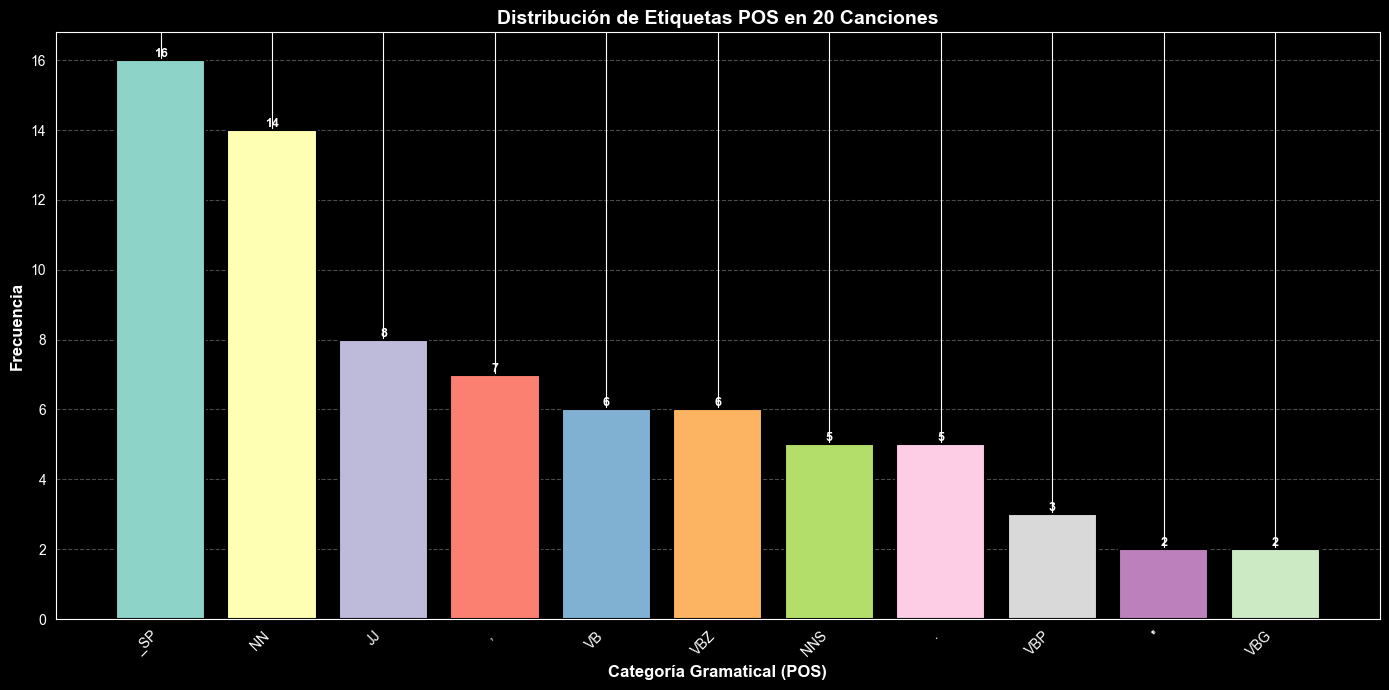


ESTADÍSTICAS DE POS TAGS

 Total de palabras (después de normalización): 74
 Tipos diferentes de POS tags: 11

 TOP 10 POS TAGS MÁS FRECUENTES:
 1. _SP   →       16 ocurrencias (21.62%)
 2. NN    →       14 ocurrencias (18.92%)
 3. JJ    →        8 ocurrencias (10.81%)
 4. ,     →        7 ocurrencias ( 9.46%)
 5. VB    →        6 ocurrencias ( 8.11%)
 6. VBZ   →        6 ocurrencias ( 8.11%)
 7. NNS   →        5 ocurrencias ( 6.76%)
 8. .     →        5 ocurrencias ( 6.76%)
 9. VBP   →        3 ocurrencias ( 4.05%)
10. ''    →        2 ocurrencias ( 2.70%)


In [47]:
# ============================================================================
# VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS
# ============================================================================

print("\n" + "="*80)
print("VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS")
print("="*80 + "\n")

# Recolectar TODOS los POS tags de todas las canciones
def extraer_todos_pos_tags(df, columna_pos='Lematizado'):
   todos_tags = []
   for pos_tags_list in df[columna_pos]:
        for tupla in pos_tags_list:
            tag = tupla[1]  # El segundo elemento es el tag
            todos_tags.append(tag)
        return todos_tags

# Extraer todos los tags
print("Extrayendo POS tags de todas las canciones...")
todos_pos_tags = extraer_todos_pos_tags(df, 'Lematizado')

# Contar frecuencias
pos_counts = Counter(todos_pos_tags)

# Ordenar por frecuencia (mayor a menor)
pos_counts_sorted = dict(sorted(pos_counts.items(), key=lambda x: x[1], reverse=True))

print(f"✓ Total de palabras analizadas: {len(todos_pos_tags):,}")
print(f"✓ Tipos de POS tags encontrados: {len(pos_counts)}")

# Visualización
fig, ax = plt.subplots(figsize=(14, 7))

pos_names = list(pos_counts_sorted.keys())
pos_values = list(pos_counts_sorted.values())

colors = plt.cm.Set3(range(len(pos_names)))
bars = ax.bar(pos_names, pos_values, color=colors, edgecolor='black', linewidth=1.5)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

ax.set_xlabel('Categoría Gramatical (POS)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax.set_title(f'Distribución de Etiquetas POS en {len(df):,} Canciones',
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Rotar etiquetas si hay muchas
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Mostrar estadísticas
print("\n" + "="*80)
print("ESTADÍSTICAS DE POS TAGS")
print("="*80)
print(f"\n Total de palabras (después de normalización): {len(todos_pos_tags):,}")
print(f" Tipos diferentes de POS tags: {len(pos_counts)}")

print("\n TOP 10 POS TAGS MÁS FRECUENTES:")
for i, (tag, count) in enumerate(list(pos_counts_sorted.items())[:10], 1):
    porcentaje = (count / len(todos_pos_tags)) * 100
    print(f"{i:2}. {tag:5} → {count:8,} ocurrencias ({porcentaje:5.2f}%)")